## Membuat model CNN untuk mengenali bentuk tangan yang membentuk gunting, batu, atau kertas.

#### Nama : Fajar Tri Utomo
#### Email : twentyone1998@gmail.com
#### Kelas : Machine Learning Untuk pemula 
#### Dataset : https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip



#### Melakukan ektraksi file zip

In [1]:
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-04-28 13:48:19--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip.2’

rockpaperscissors.z 100%[===================>] 307.92M  1.07MB/s    in 4m 47s  

2021-04-28 13:53:07 (1.07 MB/s) - ‘rockpaperscissors.zip.2’ saved [322873683/322873683]



In [2]:
# import 
import zipfile, os, shutil

local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
zip_ref

base_dir = '/tmp/rockpaperscissors'
training_dir = '/tmp/rockpaperscissors/rps-cv-images'
os.listdir(base_dir)

['rock', 'paper', 'README_rpc-cv-images.txt', 'scissors', 'rps-cv-images']

#### Menyatukan dataset 
Namun hasilnya pembagian dari train dan validation setelah di split jumlahnya tidak sesuai dengan ketentuan yaitu 1313 untuk train 876 untuk validasi, jadi tidak digunakan -> disini saya hanya mencoba saja.

In [3]:
dataset = []

for path, subdirs, files in os.walk(base_dir):
  if 'rps-cv-images' in path.split('/')[-1]:
    break

  for name in files:
    dataset.append(os.path.join(path, name)) 

# dataset.remove(dataset[0])
dataset

['/tmp/rockpaperscissors/README_rpc-cv-images.txt',
 '/tmp/rockpaperscissors/rock/32PDtFdAkUiAJbmP.png',
 '/tmp/rockpaperscissors/rock/yga4KN1EfpYG2u9w.png',
 '/tmp/rockpaperscissors/rock/CkjdMgxvvA6Ll8Ca.png',
 '/tmp/rockpaperscissors/rock/lZcZsaDTx2vWJFun.png',
 '/tmp/rockpaperscissors/rock/ikusbrqDgla4SEas.png',
 '/tmp/rockpaperscissors/rock/u3nAxX6ZNsAKQ7WC.png',
 '/tmp/rockpaperscissors/rock/lJTADoCRRndhoR4k.png',
 '/tmp/rockpaperscissors/rock/Gq8pcFEIriCTMoBY.png',
 '/tmp/rockpaperscissors/rock/9Xi2VuW7sti2BV2H.png',
 '/tmp/rockpaperscissors/rock/Jg78GVOKbbyQchWq.png',
 '/tmp/rockpaperscissors/rock/lb0hZJ95AjtXzoHf.png',
 '/tmp/rockpaperscissors/rock/7xXAch1NxPhoEdk4.png',
 '/tmp/rockpaperscissors/rock/fLFzQoErbCBRR6NM.png',
 '/tmp/rockpaperscissors/rock/BYG1hwCG8M64UXIV.png',
 '/tmp/rockpaperscissors/rock/wjljU5HhXhirxPZ3.png',
 '/tmp/rockpaperscissors/rock/zM2n6u50gHzL1i6i.png',
 '/tmp/rockpaperscissors/rock/yF6HU2xSYYVTtH91.png',
 '/tmp/rockpaperscissors/rock/koWcxNMbMRN8TxnP.

In [17]:
#load library untuk train test split
from sklearn.model_selection import train_test_split
train_dir, validation_dir = train_test_split(dataset, test_size=0.4)
len(train_dir)

1313

In [18]:
len(validation_dir)

876

#### Data Generator dan preprocessing

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_datagen = ImageDataGenerator(
                    rescale=1./225,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range=0.2,
                    fill_mode='wrap',
                    validation_split=0.4) # split data validasi 40%

In [6]:
# mengunakan image data generator
train_generator = dataset_datagen.flow_from_directory(
        training_dir, # direktori data latih
        target_size=(150,150), # mengubah resolusi seluruh gambar menjadi 150 X 150 pixel
        # batch_size=4,
        shuffle=True,
        subset='training',
        # class_mode='categorical' # karena masalah klasifikasi hanya 2 kelas jadi menggunakan binary untuk class_mode
) 

validation_generator = dataset_datagen.flow_from_directory(
        training_dir, # direktori data validasi
        target_size=(150,150), # mengubah resolusi seluruh gambar menjadi 150 X 150 pixel
        # batch_size=4, 
        # class_mode='categorical', # karena masalaha klasifikasi hanya 2 kelas jadi menggunakan binary untuk class_mode
        subset='validation'
) 

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


#### 3. Membuat model
untuk mengurangi overfitting pada model menggunakan kernel regularizer dan layers dropout 

In [7]:
import tensorflow as tf
from tensorflow.python.keras import regularizers

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3), kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(0.5),
    # tf.keras.layers.Conv2D(64,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    # tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(0.5),
    # tf.keras.layers.Conv2D(128,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    # tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax') 
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
dropout (Dropout)            (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       7

#### Model VGGnet16
disini saya mencoba membuat model dengan struktur vggnet16 tapi membutuhkan waktu eksekusi yang lama entah salah atau struktur yang terlalu kompleks sehingga tidak cocok untuk data pada submission ini. jadi saya tidak menggunakan vggnet untuk submission ini hanya mencoba saja. 

In [8]:
# from keras.applications.vgg16 import VGG16
# vgg = VGG16(weights='imagenet', include_top=True)

In [9]:
# import tensorflow as tf

# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(input_shape=(224,224,3), filters=64, kernel_size=(3,3), padding='same', activation='relu'), 
    
#     tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

#     tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
#     tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),    

#     tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'),
#     tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'),
#     tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),  

#     tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'),
#     tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'),
#     tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

#     tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'),
#     tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'),
#     tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(4096, activation='relu'),
#     tf.keras.layers.Dense(4096, activation='relu'),
#     tf.keras.layers.Dense(3, activation='softmax') 
# ])


In [10]:
# callback ModelCheckPoint
check = 'ML-Dicoding-Check'
path = F"/content/gdrive/My Drive/{check}"


checkpoint = tf.keras.callbacks.ModelCheckpoint(path, 
                                                monitor='val_loss', 
                                                verbose=2,
                                                save_best_only=False, 
                                                save_weights_only=False, 
                                                mode='auto', 
                                                save_freq='epoch', 
                                                options=None)

early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                      min_delta=0,
                      patience=40,
                      verbose=2,
                      mode='auto')

In [11]:
# compile model dengan 'RMSprop' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

#### Train Model

In [12]:
# latih model dengan model.fit
# import numpy as np

history = model.fit(
    train_generator, 
    steps_per_epoch=20, # berapa batch yang akan dieksekusi pada setiap epoch
    epochs=30, # tambahkan eposchs jika akurasi model belum optimal
    validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
    validation_steps=5, # berapa batch yang akan dieksekusi pada setiap epoch
    # verbose=2
    callbacks=[checkpoint,early])

model_save_name = 'ML-Dicoding'
path = F"/content/gdrive/My Drive/{model_save_name}" 

model.save_weights(path)


Epoch 1/30
20/20 [==============================] - 45s 2s/step - loss: 7.6538 - accuracy: 0.3475 - val_loss: 1.1893 - val_accuracy: 0.3812

Epoch 00001: saving model to /content/gdrive/My Drive/ML-Dicoding-Check
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/ML-Dicoding-Check/assets
Epoch 2/30
20/20 [==============================] - 40s 2s/step - loss: 1.3360 - accuracy: 0.4168 - val_loss: 1.1814 - val_accuracy: 0.4375

Epoch 00002: saving model to /content/gdrive/My Drive/ML-Dicoding-Check
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/ML-Dicoding-Check/assets
Epoch 3/30
20/20 [==============================] - 40s 2s/step - loss: 1.1326 - accuracy: 0.4891 - val_loss: 1.1508 - val_accuracy: 0.7875

Epoch 00003: saving model to /content/gdrive/My Drive/ML-Dicoding-Check
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/ML-Dicoding-Check/assets
Epoch 4/30
20/20 [==============================] - 39s 2s/step - loss: 1.3880 - accuracy: 0.6118 - val_lo

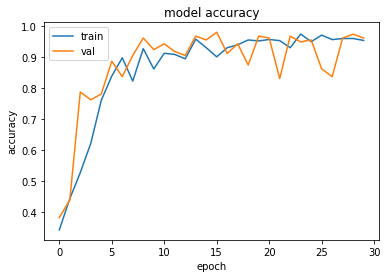

In [13]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

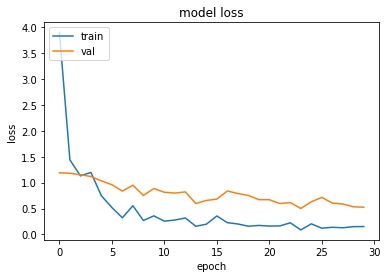

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### Prediksi gambar

Saving batu.jpeg to batu.jpeg
batu.jpeg
[[0. 1. 0.]]
Prediksi dari gambar tersebut adalah : Rock


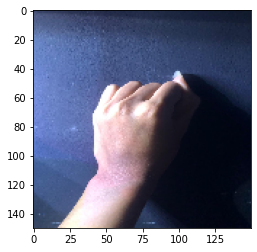

In [23]:
import numpy as np 
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  # template output
  paper     = "[[1. 0. 0.]]"
  rock      = "[[0. 1. 0.]]"
  scissors  = "[[0. 0. 1.]]"
  
  # convert array to string
  hasil = np.array_str(classes) 
  
  print(fn)
  print(hasil)

  if hasil == paper :
     print('Prediksi dari gambar tersebut adalah : Paper')
  elif hasil == rock :
     print('Prediksi dari gambar tersebut adalah : Rock')
  elif hasil == scissors :
     print('Prediksi dari gambar tersebut adalah : scissors')
  else :
     print('Gambar kurang jelas, belum dapat diprediksi')